In [10]:
import pyarrow.compute as pc
import pyarrow.dataset as ds
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
dataset = ds.dataset("offqcdata/data/smiles")

In [3]:
dataset.schema.names

['smiles',
 'O',
 'N',
 'S',
 'P',
 'F',
 'Cl',
 'Br',
 'I',
 '1,2 Aminoalcohol',
 '1,2 Diol',
 '1,2 Diphenol',
 'Acetal',
 'Acyl Bromide',
 'Acyl Chloride',
 'Acyl Cyanide',
 'Acyl Fluoride',
 'Acyl Halide',
 'Acyl Iodide',
 'Alcohol',
 'Aldehyde',
 'Alkane',
 'Alkene',
 'Alkyl Bromide',
 'Alkyl Chloride',
 'Alkyl Fluoride',
 'Alkyl Halide',
 'Alkyl Iodide',
 'Alkylarylether',
 'Alkylthiol',
 'Alkyne',
 'Alpha Aminoacid',
 'Alpha Hydroxyacid',
 'Aminal',
 'Amine',
 'Anion',
 'Aqueous',
 'Aromatic',
 'Aryl Bromide',
 'Aryl Chloride',
 'Aryl Fluoride',
 'Aryl Halide',
 'Aryl Iodide',
 'Arylthiol',
 'Azide',
 'Azo Compound',
 'Boronic Acid',
 'Boronic Acid Derivative',
 'Boronic Acid Ester',
 'CO2 Derivative',
 'Carbamic Acid',
 'Carbamic Acid Derivative',
 'Carbamic Acid Ester',
 'Carbamic Acid Halide',
 'Carbodiimide',
 'Carbonic Acid Derivative',
 'Carbonic Acid Diester',
 'Carbonic Acid Ester Halide',
 'Carbonic Acid Monoester',
 'Carbonyl',
 'Carbonyl Hydrate',
 'Carboxylic Acid',
 

In [4]:
cols = [name for name in dataset.schema.names if name not in ["smiles", "C"]]

In [5]:
table = dataset.to_table(columns=cols)

In [36]:
counts = {
    k: pc.sum(table.column(k)).as_py()
    for k in cols
}
count_df = pd.DataFrame.from_dict(counts, "index", columns=["Count"]).reset_index(names="Group")

In [37]:
count_df

,Group,Count
0,O,200505
1,N,159867
2,S,69939
3,P,915
4,F,14086
...,...,...
209,Thiosemicarbazide,4
210,Thiosemicarbazone,24
211,Thiourea,273
212,Thioxohetarene,321


In [38]:
count_df.Count

0      200505
1      159867
2       69939
3         915
4       14086
        ...  
209         4
210        24
211       273
212       321
213      2757
Name: Count, Length: 214, dtype: int64

In [46]:
count_df.sort_values("Count")

,Group,Count
156,Sulfenic Acid Halide,0
135,Phosphoric Acid,0
176,Sulfuryl Halide,0
204,Thiophosphoric Acid,0
17,Acyl Iodide,0
...,...,...
127,Oxohetarene,80711
36,Aromatic,148550
1,N,159867
93,Heterocycle,184470


In [50]:
low_counts = count_df[count_df.Count < 10]
low_counts

,Group,Count
12,Acyl Bromide,0
14,Acyl Cyanide,4
15,Acyl Fluoride,0
17,Acyl Iodide,0
25,Alkyl Halide,0
35,Aqueous,4
40,Aryl Halide,0
45,Boronic Acid,5
47,Boronic Acid Ester,4
52,Carbamic Acid Halide,4


In [51]:
len(low_counts)

35

In [39]:
len(count_df.Group.unique())

214

In [54]:
sns.__version__

'0.13.2'

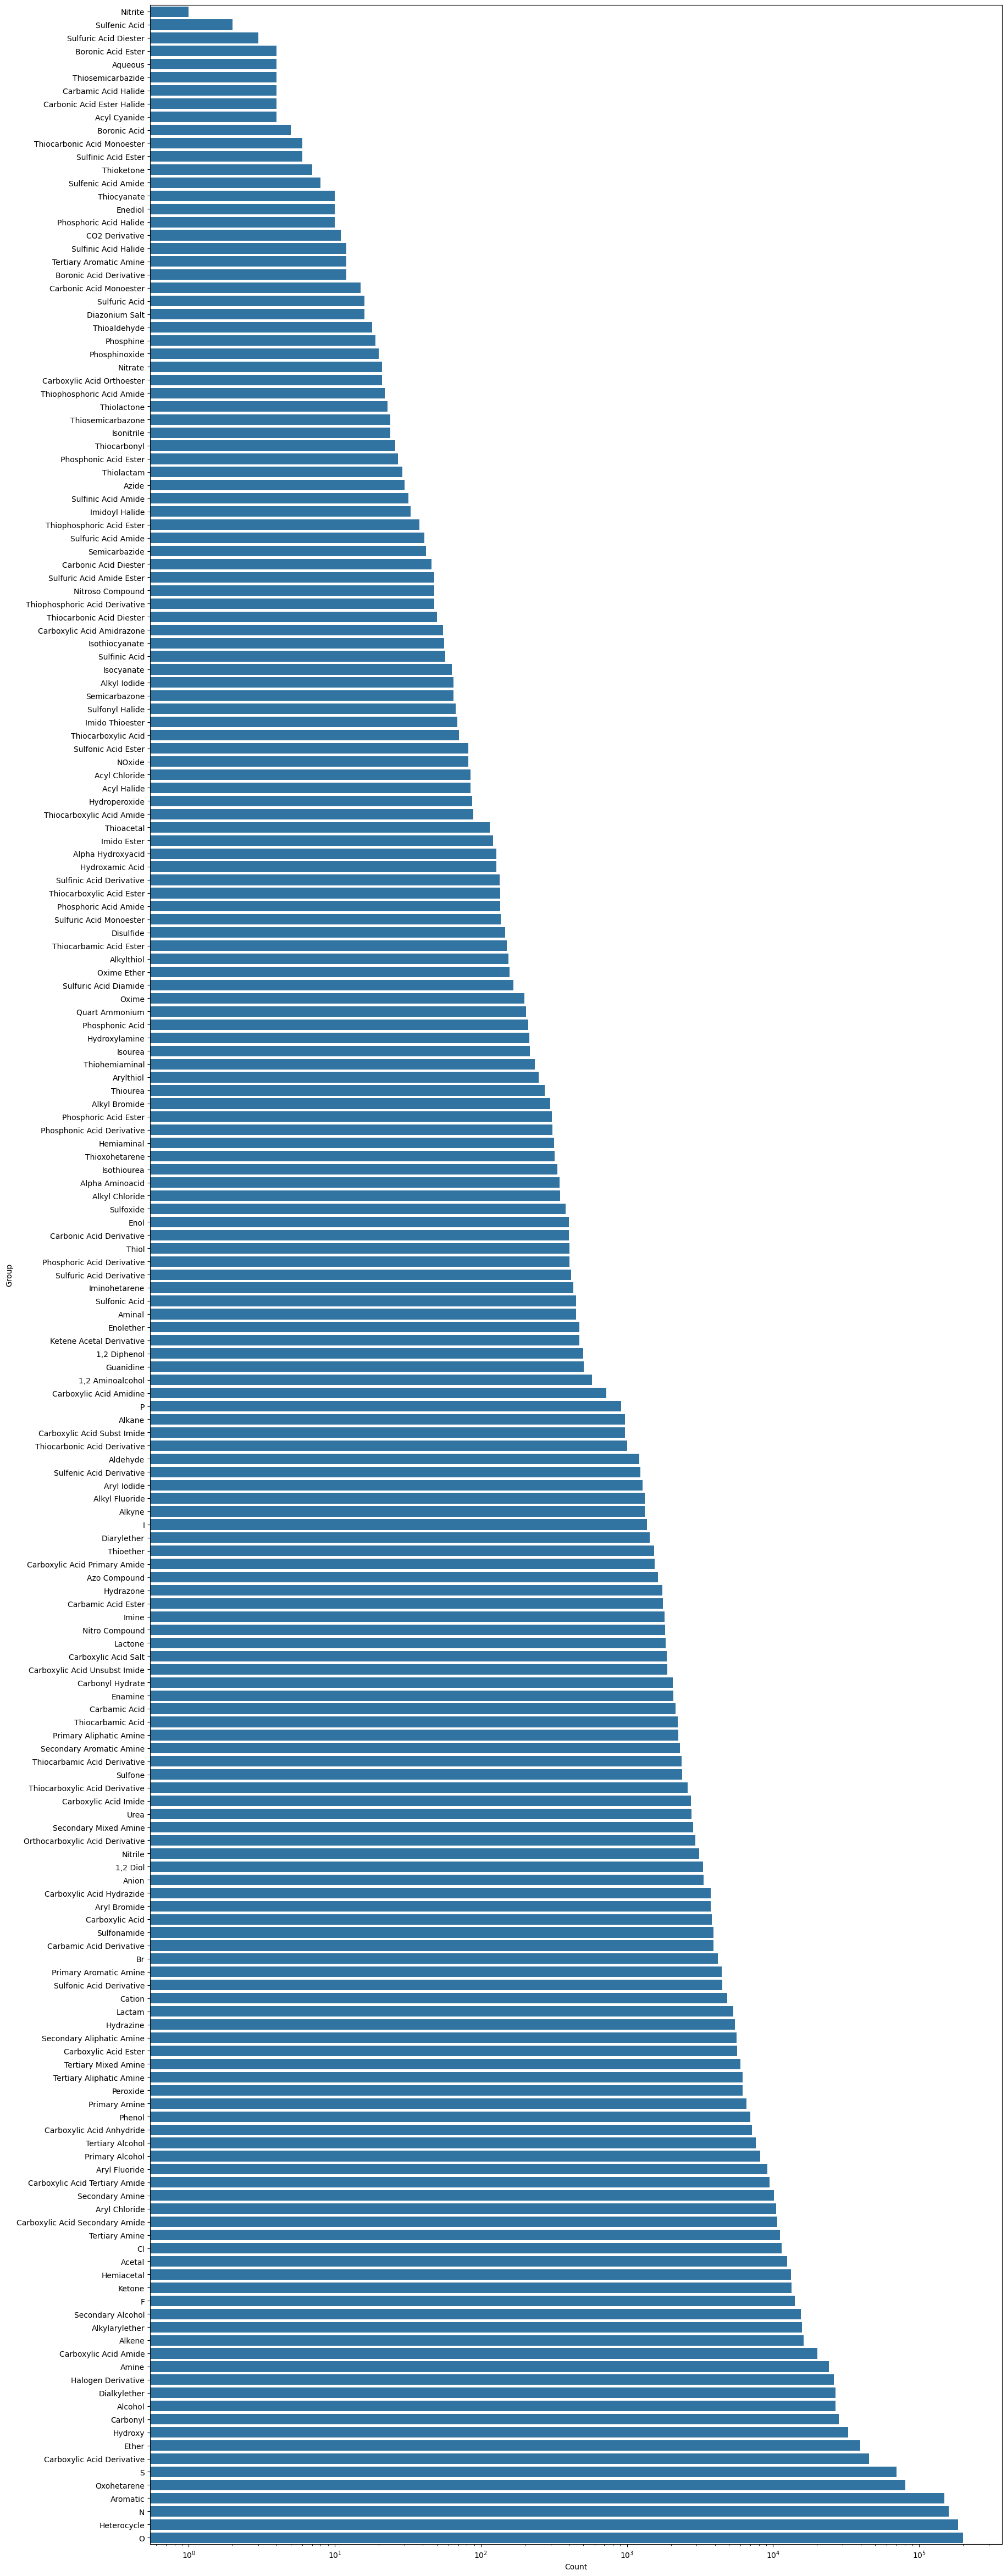

In [56]:
fig, ax = plt.subplots(figsize=(20, 60))
ax = sns.barplot(
    data=count_df[count_df.Count > 0].sort_values("Count"),
    x="Count", y="Group", orient="horizontal",
)
ax.set_xscale("log")

In [41]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 